In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fakenews_train.csv")
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
column_n = ['id', 'title', 'author', 'text', 'label']
remove_c = ['id','author']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [3]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# remove unused columns
def remove_unused_c(df, column_n=remove_c):
    df = df.drop(column_n, axis=1)
    return df


In [4]:
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(),col] = "None"
    return feature_df

# clean_data
def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)    
    #impute null value
    df = null_process(df)
    
    return df


In [11]:
df = clean_dataset(data)

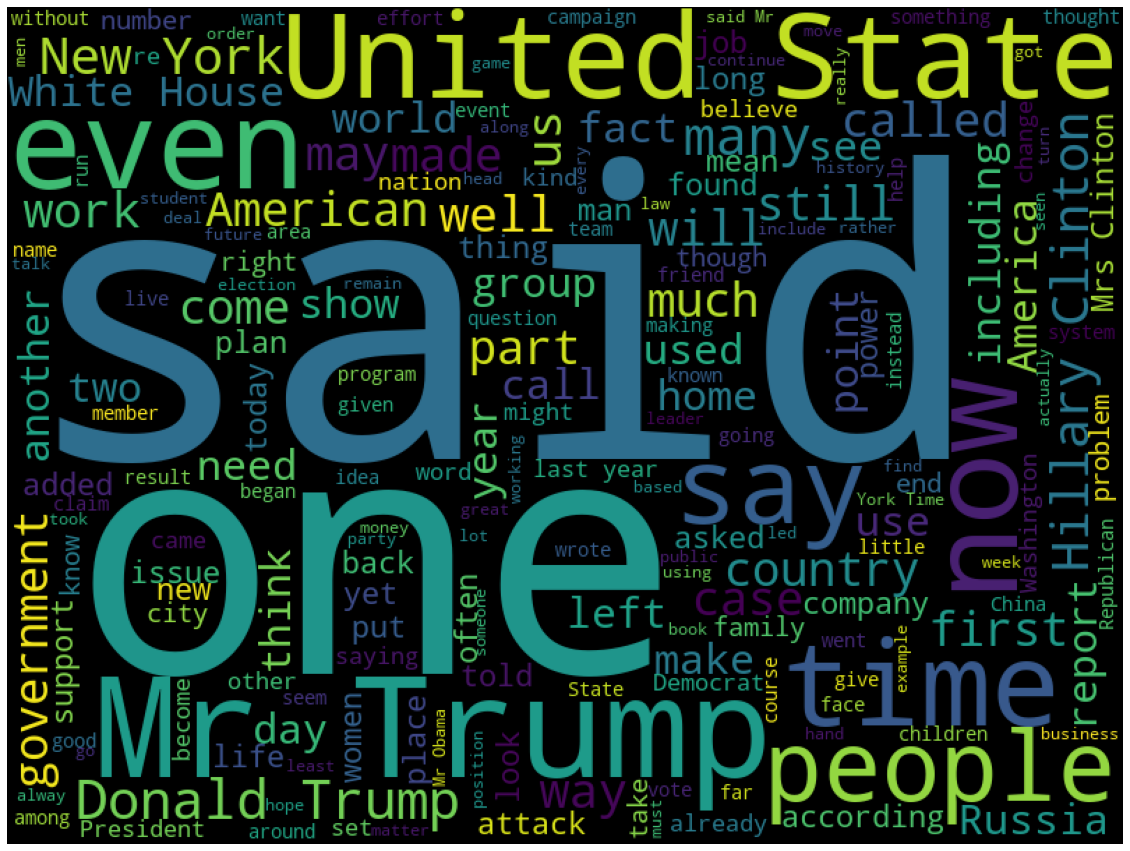

In [12]:
from wordcloud import WordCloud, STOPWORDS

# initialize the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=600)
# generate the word cloud
text_cloud = wordcloud.generate(" ".join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

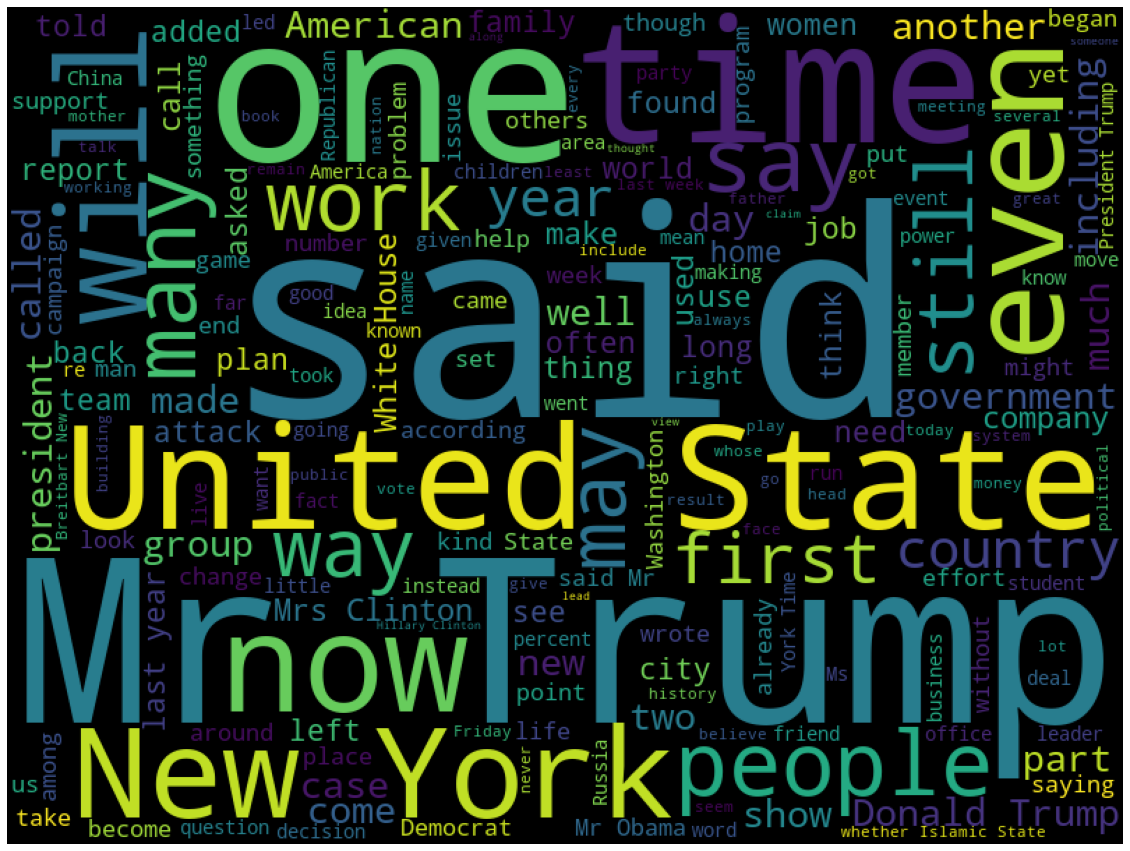

In [13]:
# reliable news (0)
reliable_news = " ".join(df[df['label']==0]['text'])
wc = wordcloud.generate(reliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

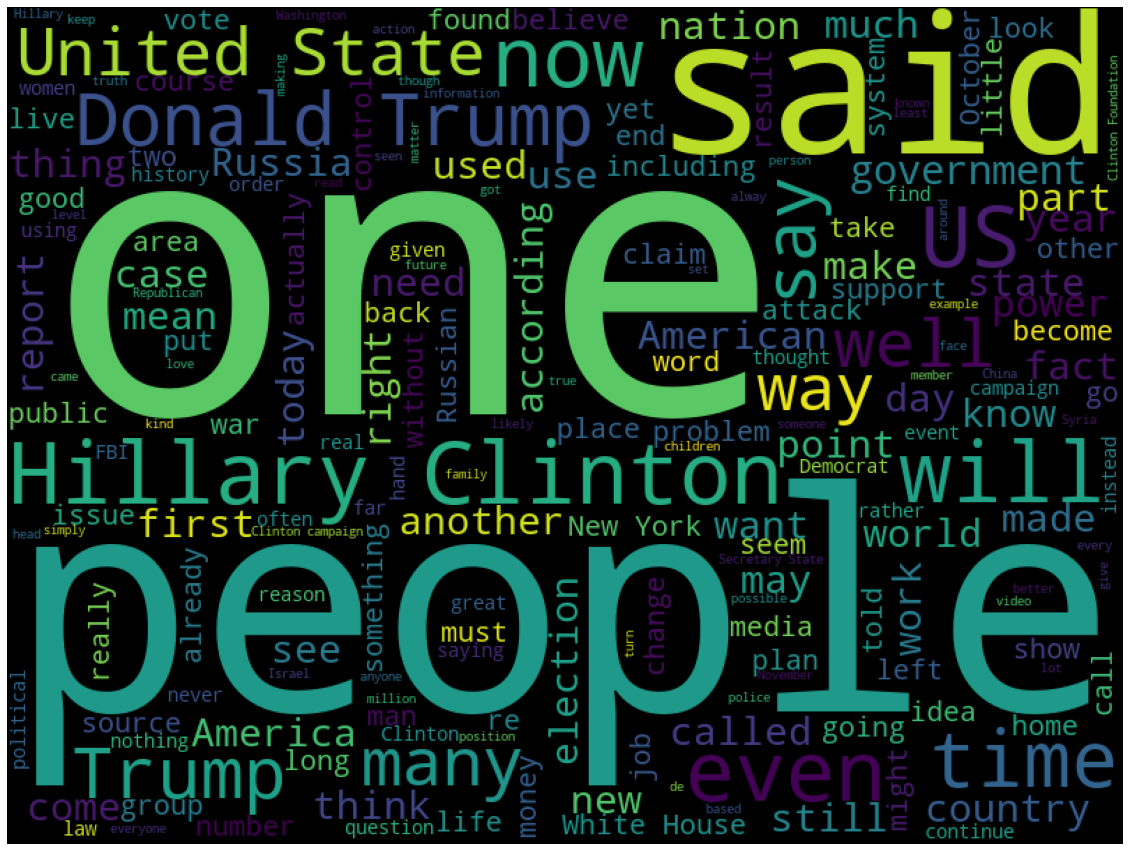

In [14]:
# unreliable news (1)
unreliable_news  = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(unreliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

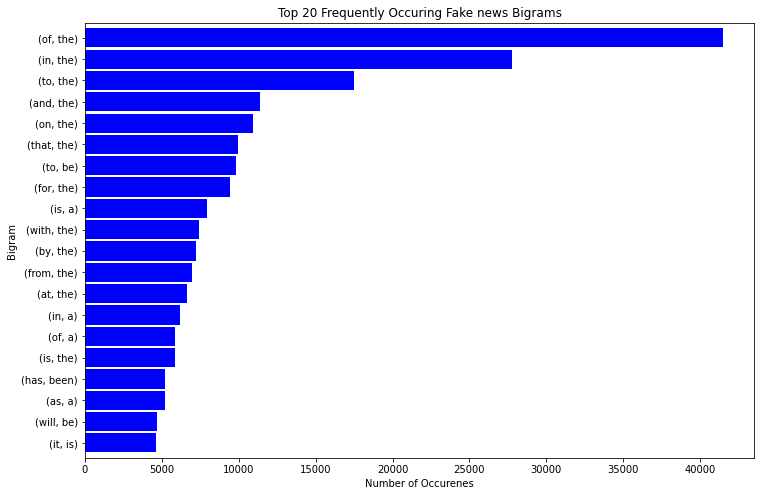

In [16]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurenes", n =2):
    true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
plot_top_ngrams(unreliable_news, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

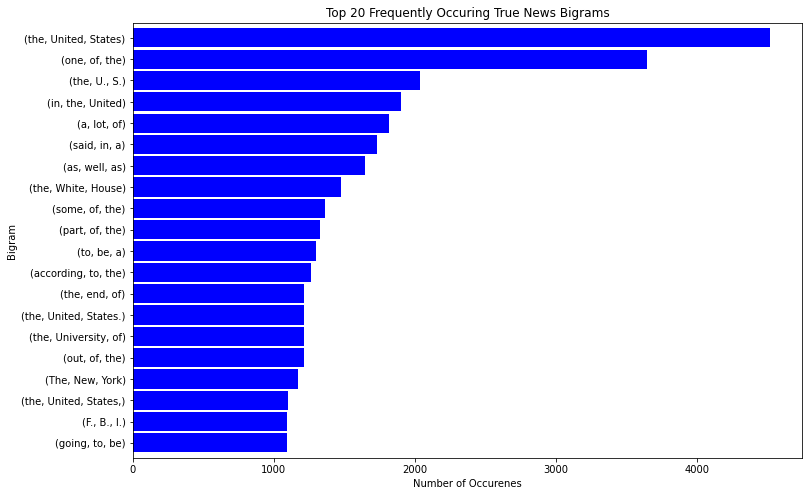

In [17]:
# Trigram
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)